In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, classification_report

In [2]:
pwd

'/Users/kingchris'

# Load the Data

In [5]:
#Load the data
price_data = pd.read_csv('AAPL2.csv')


,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700,AAPL
1,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200,AAPL
2,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100,AAPL
3,2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800,AAPL
4,2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300,AAPL


# Sort the data

In [7]:
# I Just need the Close
price_data = price_data[['Symbol','Date','Close']]

# sort the values by symbol and then date
price_data.sort_values(by = ['Symbol','Date'], inplace = True)

# Display the head before moving on.
price_data.head()

,Symbol,Date,Close
0,AAPL,2019-01-02,157.919998
1,AAPL,2019-01-03,142.190002
2,AAPL,2019-01-04,148.259995
3,AAPL,2019-01-07,147.929993
4,AAPL,2019-01-08,150.750000


In [8]:
# Display the tail before moving on.
price_data.tail()

,Symbol,Date,Close
246,AAPL,2019-12-23,284.000000
247,AAPL,2019-12-24,284.269989
248,AAPL,2019-12-26,289.910004
249,AAPL,2019-12-27,289.799988
250,AAPL,2019-12-30,291.519989


In [9]:
# calculate the change in price
price_data['change_in_price'] = price_data['Close'].diff()

# Display the head before moving on.
price_data.head()

,Symbol,Date,Close,change_in_price
0,AAPL,2019-01-02,157.919998,NaN
1,AAPL,2019-01-03,142.190002,-15.729996
2,AAPL,2019-01-04,148.259995,6.069993
3,AAPL,2019-01-07,147.929993,-0.330002
4,AAPL,2019-01-08,150.750000,2.820007


In [10]:
price_data['Lag1']=np.nan
price_data['Lag2']=np.nan
price_data['Lag3']=np.nan
price_data['Lag4']=np.nan
price_data['Lag5']=np.nan
price_data['LagClose']=np.nan
price_data.tail()

,Symbol,Date,Close,change_in_price,Lag1,Lag2,Lag3,Lag4,Lag5,LagClose
246,AAPL,2019-12-23,284.000000,4.559998,NaN,NaN,NaN,NaN,NaN,NaN
247,AAPL,2019-12-24,284.269989,0.269989,NaN,NaN,NaN,NaN,NaN,NaN
248,AAPL,2019-12-26,289.910004,5.640015,NaN,NaN,NaN,NaN,NaN,NaN
249,AAPL,2019-12-27,289.799988,-0.110016,NaN,NaN,NaN,NaN,NaN,NaN
250,AAPL,2019-12-30,291.519989,1.720001,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Assigning values to Predictors
for i in range (5,251):
    price_data.loc[i,'Lag1']=price_data.loc[i-1,'change_in_price']
    price_data.loc[i,'Lag2']=price_data.loc[i-2,'change_in_price']
    price_data.loc[i,'Lag3']=price_data.loc[i-3,'change_in_price'] 
    price_data.loc[i,'Lag4']=price_data.loc[i-4,'change_in_price']
    price_data.loc[i,'Lag5']=price_data.loc[i-5,'change_in_price']
    price_data.loc[i,'LagClose']=price_data.loc[i-1,'Close']

In [13]:
#Dropping Nan records,Adding Response Column - Direction
price_data = price_data.dropna()
price_data['Direction']=np.nan
price_data.head()

,Symbol,Date,Close,change_in_price,Lag1,Lag2,Lag3,Lag4,Lag5,LagClose,Direction
6,AAPL,2019-01-10,153.800003,0.490005,2.559998,2.820007,-0.330002,6.069993,-15.729996,153.309998,NaN
7,AAPL,2019-01-11,152.289993,-1.510010,0.490005,2.559998,2.820007,-0.330002,6.069993,153.800003,NaN
8,AAPL,2019-01-14,150.000000,-2.289993,-1.510010,0.490005,2.559998,2.820007,-0.330002,152.289993,NaN
9,AAPL,2019-01-15,153.070007,3.070007,-2.289993,-1.510010,0.490005,2.559998,2.820007,150.000000,NaN
10,AAPL,2019-01-16,154.940002,1.869995,3.070007,-2.289993,-1.510010,0.490005,2.559998,153.070007,NaN


In [14]:
#Assigning values to Direction
def def_direction(cols):
    Direction = cols[0]
    change_in_price = cols[1]
    if change_in_price > 0:
        return 1
    else:
        return 0

In [15]:
price_data['Direction'] = price_data[['Direction','change_in_price']].apply(def_direction,axis=1)
price_data

,Symbol,Date,Close,change_in_price,Lag1,Lag2,Lag3,Lag4,Lag5,LagClose,Direction
6,AAPL,2019-01-10,153.800003,0.490005,2.559998,2.820007,-0.330002,6.069993,-15.729996,153.309998,1
7,AAPL,2019-01-11,152.289993,-1.510010,0.490005,2.559998,2.820007,-0.330002,6.069993,153.800003,0
8,AAPL,2019-01-14,150.000000,-2.289993,-1.510010,0.490005,2.559998,2.820007,-0.330002,152.289993,0
9,AAPL,2019-01-15,153.070007,3.070007,-2.289993,-1.510010,0.490005,2.559998,2.820007,150.000000,1
10,AAPL,2019-01-16,154.940002,1.869995,3.070007,-2.289993,-1.510010,0.490005,2.559998,153.070007,1
...,...,...,...,...,...,...,...,...,...,...,...
246,AAPL,2019-12-23,284.000000,4.559998,-0.579987,0.279999,-0.670014,0.550019,4.709991,279.440002,1
247,AAPL,2019-12-24,284.269989,0.269989,4.559998,-0.579987,0.279999,-0.670014,0.550019,284.000000,1
248,AAPL,2019-12-26,289.910004,5.640015,0.269989,4.559998,-0.579987,0.279999,-0.670014,284.269989,1
249,AAPL,2019-12-27,289.799988,-0.110016,5.640015,0.269989,4.559998,-0.579987,0.279999,289.910004,0


In [16]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 6 to 250
Data columns (total 11 columns):
Symbol             245 non-null object
Date               245 non-null object
Close              245 non-null float64
change_in_price    245 non-null float64
Lag1               245 non-null float64
Lag2               245 non-null float64
Lag3               245 non-null float64
Lag4               245 non-null float64
Lag5               245 non-null float64
LagClose           245 non-null float64
Direction          245 non-null int64
dtypes: float64(8), int64(1), object(2)
memory usage: 23.0+ KB


In [ ]:
# OPTIONAL CODE: Dump the data frame to a CSV file to examine the data yourself.
# price_data.to_csv('final_metrics.csv')

In [17]:
price_data.columns

Index(['Symbol', 'Date', 'Close', 'change_in_price', 'Lag1', 'Lag2', 'Lag3',
       'Lag4', 'Lag5', 'LagClose', 'Direction'],
      dtype='object')

In [18]:
price_data_train = price_data.where(price_data['Date'] < '2019-12-01').dropna()
price_data_train = price_data_train.copy()
price_data_train

,Symbol,Date,Close,change_in_price,Lag1,Lag2,Lag3,Lag4,Lag5,LagClose,Direction
6,AAPL,2019-01-10,153.800003,0.490005,2.559998,2.820007,-0.330002,6.069993,-15.729996,153.309998,1.0
7,AAPL,2019-01-11,152.289993,-1.510010,0.490005,2.559998,2.820007,-0.330002,6.069993,153.800003,0.0
8,AAPL,2019-01-14,150.000000,-2.289993,-1.510010,0.490005,2.559998,2.820007,-0.330002,152.289993,0.0
9,AAPL,2019-01-15,153.070007,3.070007,-2.289993,-1.510010,0.490005,2.559998,2.820007,150.000000,1.0
10,AAPL,2019-01-16,154.940002,1.869995,3.070007,-2.289993,-1.510010,0.490005,2.559998,153.070007,1.0
...,...,...,...,...,...,...,...,...,...,...,...
226,AAPL,2019-11-22,261.779999,-0.230011,-1.179992,-3.100007,-0.809997,1.339996,3.119995,262.010010,0.0
227,AAPL,2019-11-25,266.369995,4.589996,-0.230011,-1.179992,-3.100007,-0.809997,1.339996,261.779999,1.0
228,AAPL,2019-11-26,264.290009,-2.079986,4.589996,-0.230011,-1.179992,-3.100007,-0.809997,266.369995,0.0
229,AAPL,2019-11-27,267.839996,3.549987,-2.079986,4.589996,-0.230011,-1.179992,-3.100007,264.290009,1.0


In [19]:
price_data_test = price_data.where(price_data['Date'] > '2019-12-01').dropna()
price_data_test = price_data_test.copy()
price_data_test

,Symbol,Date,Close,change_in_price,Lag1,Lag2,Lag3,Lag4,Lag5,LagClose,Direction
231,AAPL,2019-12-02,264.160004,-3.089996,-0.589996,3.549987,-2.079986,4.589996,-0.230011,267.250000,0.0
232,AAPL,2019-12-03,259.450012,-4.709992,-3.089996,-0.589996,3.549987,-2.079986,4.589996,264.160004,0.0
233,AAPL,2019-12-04,261.739990,2.289978,-4.709992,-3.089996,-0.589996,3.549987,-2.079986,259.450012,1.0
234,AAPL,2019-12-05,265.579987,3.839997,2.289978,-4.709992,-3.089996,-0.589996,3.549987,261.739990,1.0
235,AAPL,2019-12-06,270.709991,5.130004,3.839997,2.289978,-4.709992,-3.089996,-0.589996,265.579987,1.0
236,AAPL,2019-12-09,266.920013,-3.789978,5.130004,3.839997,2.289978,-4.709992,-3.089996,270.709991,0.0
237,AAPL,2019-12-10,268.480011,1.559998,-3.789978,5.130004,3.839997,2.289978,-4.709992,266.920013,1.0
238,AAPL,2019-12-11,270.769989,2.289978,1.559998,-3.789978,5.130004,3.839997,2.289978,268.480011,1.0
239,AAPL,2019-12-12,271.459991,0.690002,2.289978,1.559998,-3.789978,5.130004,3.839997,270.769989,1.0
240,AAPL,2019-12-13,275.149994,3.690003,0.690002,2.289978,1.559998,-3.789978,5.130004,271.459991,1.0


In [ ]:
x_train = price_data_train[['Lag1','Lag2','Lag3','Lag4','Lag5','LagClose']] 
y_train = price_data_train['Direction']
x_test = price_data_test[['Lag1','Lag2','Lag3','Lag4','Lag5','LagClose']] 
y_test = price_data_test['Direction']

In [20]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Any row that has a `NaN` value will be dropped.
price_data = price_data.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns'.format(price_data.shape[0], price_data.shape[1]))

# Print the head.
price_data.head()

Before NaN Drop we have 245 rows and 11 columns
After NaN Drop we have 245 rows and 11 columns


,Symbol,Date,Close,change_in_price,Lag1,Lag2,Lag3,Lag4,Lag5,LagClose,Direction
6,AAPL,2019-01-10,153.800003,0.490005,2.559998,2.820007,-0.330002,6.069993,-15.729996,153.309998,1
7,AAPL,2019-01-11,152.289993,-1.510010,0.490005,2.559998,2.820007,-0.330002,6.069993,153.800003,0
8,AAPL,2019-01-14,150.000000,-2.289993,-1.510010,0.490005,2.559998,2.820007,-0.330002,152.289993,0
9,AAPL,2019-01-15,153.070007,3.070007,-2.289993,-1.510010,0.490005,2.559998,2.820007,150.000000,1
10,AAPL,2019-01-16,154.940002,1.869995,3.070007,-2.289993,-1.510010,0.490005,2.559998,153.070007,1


In [57]:
x_train = price_data_train[['Lag1','Lag2','Lag3','Lag4','Lag5','LagClose']] 
y_train = price_data_train['Direction']

x_test = price_data_test[['Lag1','Lag2','Lag3','Lag4','Lag5','LagClose']] 
y_test = price_data_test['Direction']



# Grab our X & Y Columns.
# X_Cols = price_data[['Lag1','Lag2','Lag3','Lag4','Lag5','LagClose']]
# Y_Cols = price_data['Direction']

# Split X and y into X_
# x_train, x_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)

# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

# Fit the data to the model
rand_frst_clf.fit(x_train, y_train)

# Make predictions
y_pred = rand_frst_clf.predict(x_test)

In [44]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [58]:
# Print the Accuracy of our Model.
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(x_test), normalize = True) * 100.0)

Correct Prediction (%):  56.451612903225815


In [59]:
# Define the target names
target_names = ['Down Day', 'Up Day']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
Down Day,0.444444,0.320000,0.372093,25.000000
Up Day,0.613636,0.729730,0.666667,37.000000
accuracy,0.564516,0.564516,0.564516,0.564516
macro avg,0.529040,0.524865,0.519380,62.000000
weighted avg,0.545414,0.564516,0.547887,62.000000


In [60]:
from sklearn.metrics import confusion_matrix

rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))




Accuracy: 0.5645161290322581
Percision: 0.6136363636363636
Recall: 0.7297297297297297
Specificity: 0.32


In [61]:
# Calculate feature importance and store in pandas series
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
feature_imp

Lag2        0.176188
LagClose    0.171711
Lag5        0.170179
Lag4        0.168485
Lag3        0.161523
Lag1        0.151914
dtype: float64

Text(0.5, 1.0, 'Random Forest: Feature Importance Graph')

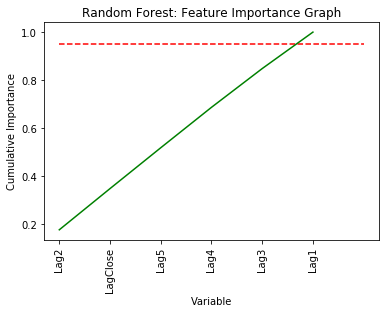

In [62]:
# store the values in a list to plot.
x_values = list(range(len(rand_frst_clf.feature_importances_)))

# Cumulative importances
cumulative_importances = np.cumsum(feature_imp.values)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin = 0, xmax = len(feature_imp), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, feature_imp.index, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable')
plt.ylabel('Cumulative Importance')
plt.title('Random Forest: Feature Importance Graph')

In [52]:
from sklearn.metrics import roc_curve

In [53]:
# Create an ROC Curve plot.
rfc_disp = roc_curve(rand_frst_clf, x_test, y_test, alpha = 0.8)
plt.show()

TypeError: roc_curve() got an unexpected keyword argument 'alpha'

In [63]:
print('Random Forest Out-Of-Bag Error Score: {}'.format(rand_frst_clf.oob_score_))

Random Forest Out-Of-Bag Error Score: 0.4918032786885246
